<h1>Password Strength data</h1>

In [1]:
#Importing the libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'data.csv')

In [3]:
df.sample(5)

,password,strength
594956,25524a,0
132845,keiu42l,0
79220,muiema112,1
238570,ufysuvo321,1
261132,rcijhpo362,1


In [4]:
df.shape

(669879, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 669879 entries, 0 to 669878
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   password  669876 non-null  object
 1   strength  669816 non-null  object
dtypes: object(2)
memory usage: 10.2+ MB


In [6]:
df['strength'].value_counts()

1                             496749
0                              89669
2                              82929
n                                  5
l&#305                             4
                               ...  
nakodum                            1
bursa223@hotmail.com               1
beylikovajumla@mynet.com           1
goktas                             1
cengiz_metin35@hotmail.com         1
Name: strength, Length: 446, dtype: int64

### Removing absurd class labels

In [7]:
df=df[df['strength'].isin(['1','2','0'])]
df['strength'] = df['strength'].astype('int32')

In [8]:
df['strength'].value_counts()

1    496749
0     89669
2     82929
Name: strength, dtype: int64

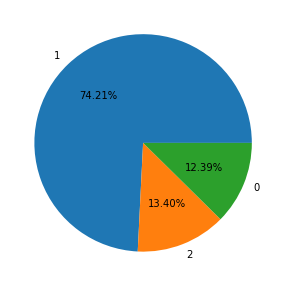

In [9]:
freq = df['strength'].value_counts().tolist()
label = df['strength'].unique().tolist()
plt.figure(figsize=(5,5))
plt.pie(freq, labels = label,autopct='%1.2f%%')
plt.show()

<h3>Handling duplicates and missing values</h3>

In [10]:
df[df.duplicated()].sort_values(by='password')

,password,strength
267610,0,0
635055,0,0
399434,0,0
183474,10203,0
336362,10203,0
666750,111111,0
423802,123,0
482068,123,0
613293,123,0
625826,123,0


In [11]:
print(df.duplicated().sum())

19


In [12]:
df.drop_duplicates(inplace=True)
print(df.duplicated().sum())

0


In [13]:
#password containing only spaces are replaced by nan
df = df.replace(['^\s+$'], np.nan, regex = True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 669328 entries, 0 to 669878
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   password  669327 non-null  object
 1   strength  669328 non-null  int32 
dtypes: int32(1), object(1)
memory usage: 12.8+ MB


In [15]:
df.isna().sum()

password    1
strength    0
dtype: int64

In [16]:
df.dropna(how='any',inplace=True)
print(df.isna().sum())

password    0
strength    0
dtype: int64


In [17]:
#Checing if the password is contains only space
df['password'].str.isspace().sum()

0

In [18]:
df.columns

Index(['password', 'strength'], dtype='object')

In [19]:
df.shape

(669327, 2)

In [20]:
df.to_csv('password_data.csv',index=False)

<h3>Findings:-</h3>
<h5>1)It is a multiclass data with data containing 669327 rows and two columns first is password and second is strength (class label)</h5>
    <p>a)class 0 -> weak password strength</p>
    <p>b)class 1 -> medium password strength</p>
    <p>c)class 2 -> strong password strength</p>
    
<h5>2)Data is not balance</h5> 
    <p>a)class 0 (12.39%) and class 2 (13.40) are almost balanced</p>
    <p>b)Almost 74.12% data points are of class 1 in our data</p>
     
   <h7>**Possible solutions:</h7>
   <p>-->Can do upsampling (results in overfitting) or downsampling (results in lost of importatnt data)</p>
   <p>-->Can use smote to create synthetic data points for spam class (not very suitable for text data but can work sometimes</p>
   <p>-->Can use models with giving equal weight to both the classes</p>
    
<h5>3)Data contains some duplicates and 1 missing value</h5>    
<p>a)since duplicates and missing values are very less we can remove them easily</p>

<h3>Data Inspection</h3>  

In [21]:
df['length'] = df['password'].str.len()

In [22]:
df.sample(5)

,password,strength,length
358503,tukute48,1,8
66644,1kraken,0,7
390651,ie2ZG3TExMAkZxJ3,2,16
172886,sugagu674,1,9
454822,mpublico5,1,9


In [23]:
#cheking length of words on basis of class label
print('Length of three classes:\n')
print(df.groupby('strength')['length'].max())
print('**********************************************')
print('Min lenth of three classes:\n')
print(df.groupby('strength')['length'].min())
print('**********************************************')
print('Mean lenth of three classes:\n')
print(df.groupby('strength')['length'].mean())
print('**********************************************')
print('Median lenth of three classes:\n')
print(df.groupby('strength')['length'].median())

Length of three classes:

strength
0     13
1     14
2    220
Name: length, dtype: int64
**********************************************
Min lenth of three classes:

strength
0     1
1     3
2    14
Name: length, dtype: int64
**********************************************
Mean lenth of three classes:

strength
0     6.548672
1     9.618516
2    15.926925
Name: length, dtype: float64
**********************************************
Median lenth of three classes:

strength
0     7
1     9
2    16
Name: length, dtype: int64


In [24]:
l=df.strength.unique()
for i in l:
    print('For Class {}\n'.format(i))
    print(df[df.strength == i].length.value_counts().head())
    print('**************************************************') 

For Class 1

9     144444
10    137487
8     112317
11     45111
12     37327
Name: length, dtype: int64
**************************************************
For Class 2

16    55606
14    10811
15     9809
17     1772
18     1284
Name: length, dtype: int64
**************************************************
For Class 0

7    49561
6    39818
5      189
4       36
3       24
Name: length, dtype: int64
**************************************************


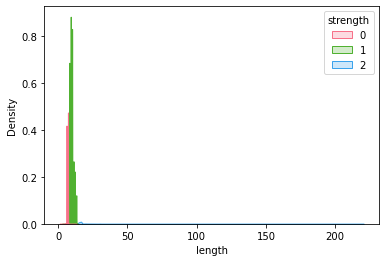

In [25]:
sns.kdeplot(data=df, x="length", hue='strength',fill=True ,palette=sns.color_palette("husl", 3))
plt.show()

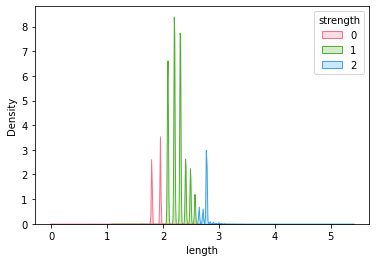

In [26]:
sns.kdeplot(data=df, x=np.log(df.length), hue='strength',fill=True ,palette=sns.color_palette("husl", 3))
plt.show()

In [27]:
df.columns

Index(['password', 'strength', 'length'], dtype='object')

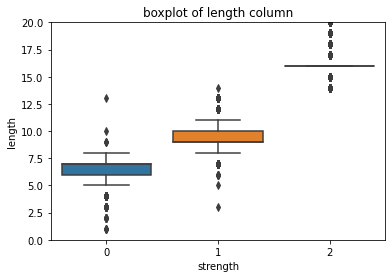

In [28]:
sns.boxplot(x="strength", y="length", data=df)
plt.title("boxplot of length column")
plt.ylim([0,20])
plt.show()

In [29]:
df['count_spc'] = df['password'].str.findall(r'[^a-zA-Z0-9]').str.len()

In [30]:
df[df['count_spc'] > 0].sample(5)

,password,strength,length,count_spc
119569,NS01.FREENOM.COM,2,16,2
38011,blackvega/,1,10,1
254470,Xlol1k**^_^**^^,2,15,9
8104,5199950011097413JORDI!,2,22,1
153659,nicklov3rbl@ck,2,14,1


In [31]:
print('special characters of three classes:\n')
print(df.groupby('strength')['count_spc'].max())
print('**********************************************')
print('Min lenth of three classes:\n')
print(df.groupby('strength')['count_spc'].min())
print('**********************************************')
print('Mean lenth of three classes:\n')
print(df.groupby('strength')['count_spc'].mean())
print('**********************************************')
print('Median lenth of three classes:\n')
print(df.groupby('strength')['count_spc'].median())

special characters of three classes:

strength
0     7
1    11
2    29
Name: count_spc, dtype: int64
**********************************************
Min lenth of three classes:

strength
0    0
1    0
2    0
Name: count_spc, dtype: int64
**********************************************
Mean lenth of three classes:

strength
0    0.021695
1    0.018673
2    0.228002
Name: count_spc, dtype: float64
**********************************************
Median lenth of three classes:

strength
0    0
1    0
2    0
Name: count_spc, dtype: int64


In [32]:
l=df.strength.unique()
for i in l:
    print('For Class {}\n'.format(i))
    print(df[df.strength == i].count_spc.value_counts().head())
    print('**************************************************') 

For Class 1

0    490930
1      3796
2      1258
3       404
4       200
Name: count_spc, dtype: int64
**************************************************
For Class 2

0    71814
1     6927
2     2355
3     1066
4      356
Name: count_spc, dtype: int64
**************************************************
For Class 0

0    88268
1     1091
2      149
3       93
6       21
Name: count_spc, dtype: int64
**************************************************


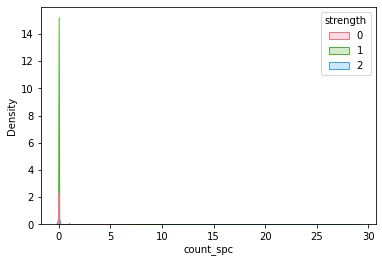

In [33]:
sns.kdeplot(data=df, x="count_spc", hue='strength',fill=True ,palette=sns.color_palette("husl", 3))
plt.show()

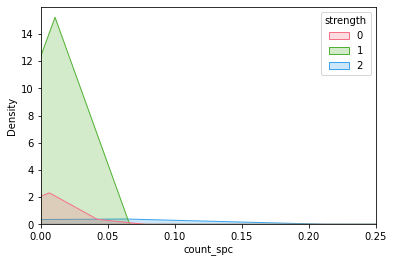

In [34]:
sns.kdeplot(data=df, x="count_spc", hue='strength',fill=True ,palette=sns.color_palette("husl", 3))
plt.xlim([0,0.25])
plt.show()

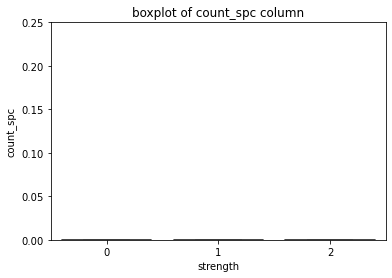

In [35]:
sns.boxplot(x="strength", y="count_spc", data=df)
plt.title("boxplot of count_spc column")
plt.ylim([0,0.25])
plt.show()

In [36]:
df['num_len'] = df['password'].str.count('\d')

In [37]:
df.sample(5)

,password,strength,length,count_spc,num_len
600490,bopybi531,1,9,0,3
62358,182total90,1,10,0,5
618538,seabright1,1,10,0,1
511199,delta007,1,8,0,3
89235,secreat112233,1,13,0,6


In [38]:
#cheking length of words on basis of class label
print('Length of numbers of three classes:\n')
print(df.groupby('strength')['num_len'].max())
print('**********************************************')
print('Min lenth of three classes:\n')
print(df.groupby('strength')['num_len'].min())
print('**********************************************')
print('Mean lenth of three classes:\n')
print(df.groupby('strength')['num_len'].mean())
print('**********************************************')
print('Median lenth of three classes:\n')
print(df.groupby('strength')['num_len'].median())

Length of numbers of three classes:

strength
0    10
1    12
2    39
Name: num_len, dtype: int64
**********************************************
Min lenth of three classes:

strength
0    0
1    0
2    0
Name: num_len, dtype: int64
**********************************************
Mean lenth of three classes:

strength
0    1.774381
1    3.449726
2    3.093827
Name: num_len, dtype: float64
**********************************************
Median lenth of three classes:

strength
0    2
1    3
2    3
Name: num_len, dtype: int64


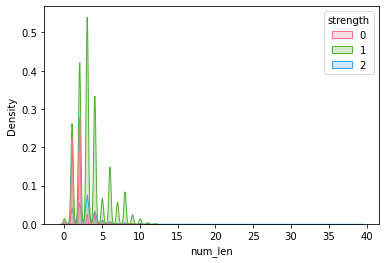

In [39]:
sns.kdeplot(data=df, x="num_len", hue='strength',fill=True ,palette=sns.color_palette("husl", 3))
plt.show()

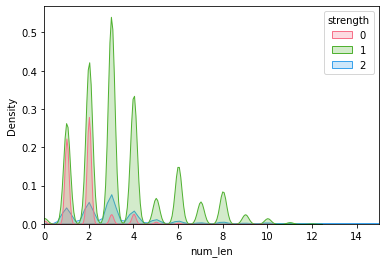

In [40]:
sns.kdeplot(data=df, x="num_len", hue='strength',fill=True ,palette=sns.color_palette("husl", 3))
plt.xlim([0,15])
plt.show()

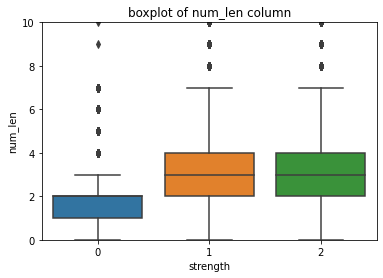

In [41]:
sns.boxplot(x="strength", y="num_len", data=df)
plt.title("boxplot of num_len column")
plt.ylim([0,10])
plt.show()

In [42]:
def upper_case(s):
    count=0
    for i in s:
        if(i.isupper()):
            count+=1
    return count            

In [43]:
df['uppercase']=df['password'].apply(lambda x : upper_case(x))

In [44]:
df[df['uppercase']>0].sample(5)

,password,strength,length,count_spc,num_len,uppercase
645579,P35O4PTg0NQ2teG1,2,16,0,6,7
29161,jZvkIkzMxOQrkEO4,2,16,0,1,7
616467,LHoI8JjMxMAeRuhH,2,16,0,1,9
655728,gdL2MyTcyMAfISXt,2,16,0,1,8
2027,ElOLEQofIdu312,2,14,0,3,6


In [45]:
print('Length of uppercase chars three classes:\n')
print(df.groupby('strength')['uppercase'].max())
print('**********************************************')
print('Min lenth of three classes:\n')
print(df.groupby('strength')['uppercase'].min())
print('**********************************************')
print('Mean lenth of three classes:\n')
print(df.groupby('strength')['uppercase'].mean())
print('**********************************************')
print('Median lenth of three classes:\n')
print(df.groupby('strength')['uppercase'].median())

Length of uppercase chars three classes:

strength
0     7
1    12
2    80
Name: uppercase, dtype: int64
**********************************************
Min lenth of three classes:

strength
0    0
1    0
2    0
Name: uppercase, dtype: int64
**********************************************
Mean lenth of three classes:

strength
0    0.078828
1    0.081768
2    5.835884
Name: uppercase, dtype: float64
**********************************************
Median lenth of three classes:

strength
0    0
1    0
2    6
Name: uppercase, dtype: int64


In [46]:
l=df.strength.unique()
for i in l:
    print('For Class {}\n'.format(i))
    print(df[df.strength == i].uppercase.value_counts().head())
    print('**************************************************') 

For Class 1

0    487981
1      1535
6      1291
2      1055
7       922
Name: uppercase, dtype: int64
**************************************************
For Class 2

7    12978
8    12110
6    11200
9     8572
1     7644
Name: uppercase, dtype: int64
**************************************************
For Class 0

0    87931
5      597
4      382
6      273
2      186
Name: uppercase, dtype: int64
**************************************************


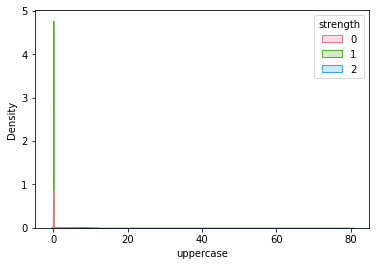

In [47]:
sns.kdeplot(data=df, x="uppercase", hue='strength',fill=True ,palette=sns.color_palette("husl", 3))
plt.show()

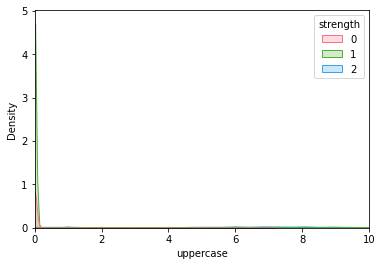

In [48]:
sns.kdeplot(data=df, x="uppercase", hue='strength',fill=True ,palette=sns.color_palette("husl", 3))
plt.xlim([0,10])
plt.show()

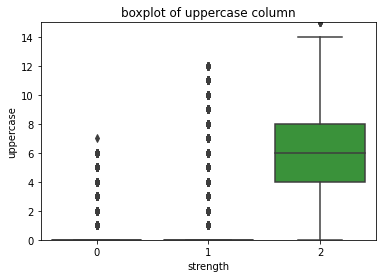

In [49]:
sns.boxplot(x="strength", y="uppercase", data=df)
plt.title("boxplot of uppercase column")
plt.ylim([0,15])
plt.show()

In [50]:
def lower_case(s):
    count=0
    for i in s:
        if(i.islower()):
            count+=1
    return count 

In [51]:
df['lowercase']=df['password'].apply(lambda x : lower_case(x))

In [52]:
df[(df['lowercase']>0) & (df['uppercase']>0)].sample(5)

,password,strength,length,count_spc,num_len,uppercase,lowercase
641858,839KUFYkurONagE,2,15,0,3,7,5
379830,Y8dvbcTk0MQxICoV,2,16,0,2,7,7
577616,10Erd1ib1bi1v3,2,14,0,6,1,7
222811,aypRCzDk5NQrfNkK,2,16,0,1,7,8
567431,Djndfvbcvthnmcerb89,2,19,0,2,1,16


In [53]:
print('Length of numbers of three classes:\n')
print(df.groupby('strength')['lowercase'].max())
print('**********************************************')
print('Min lenth of three classes:\n')
print(df.groupby('strength')['lowercase'].min())
print('**********************************************')
print('Mean lenth of three classes:\n')
print(df.groupby('strength')['lowercase'].mean())
print('**********************************************')
print('Median lenth of three classes:\n')
print(df.groupby('strength')['lowercase'].median())

Length of numbers of three classes:

strength
0     13
1     12
2    164
Name: lowercase, dtype: int64
**********************************************
Min lenth of three classes:

strength
0    0
1    0
2    0
Name: lowercase, dtype: int64
**********************************************
Mean lenth of three classes:

strength
0    4.674549
1    6.068689
2    6.769827
Name: lowercase, dtype: float64
**********************************************
Median lenth of three classes:

strength
0    5
1    6
2    6
Name: lowercase, dtype: int64


In [54]:
l=df.strength.unique()
for i in l:
    print('For Class {}\n'.format(i))
    print(df[df.strength == i].lowercase.value_counts().head())
    print('**************************************************') 

For Class 1

6    100449
7    100202
8     70569
5     60009
9     39620
Name: lowercase, dtype: int64
**************************************************
For Class 2

6    14871
5    13086
7    12651
8     9071
4     9005
Name: lowercase, dtype: int64
**************************************************
For Class 0

5    36571
6    23509
4    18398
3     4074
2     3867
Name: lowercase, dtype: int64
**************************************************


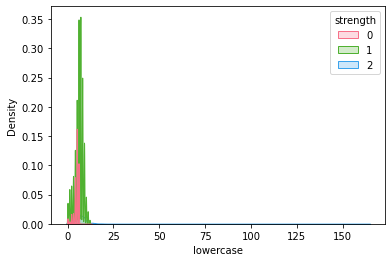

In [55]:
sns.kdeplot(data=df, x="lowercase", hue='strength',fill=True ,palette=sns.color_palette("husl", 3))
plt.show()

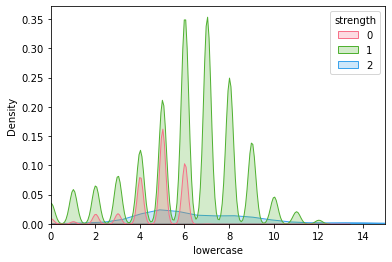

In [56]:
sns.kdeplot(data=df, x="lowercase", hue='strength',fill=True ,palette=sns.color_palette("husl", 3))
plt.xlim([0,15])
plt.show()

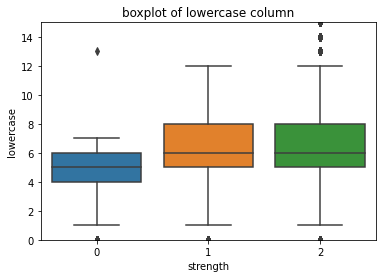

In [57]:
sns.boxplot(x="strength", y="lowercase", data=df)
plt.title("boxplot of lowercase column")
plt.ylim([0,15])
plt.show()

In [58]:
df.columns

Index(['password', 'strength', 'length', 'count_spc', 'num_len', 'uppercase',
       'lowercase'],
      dtype='object')

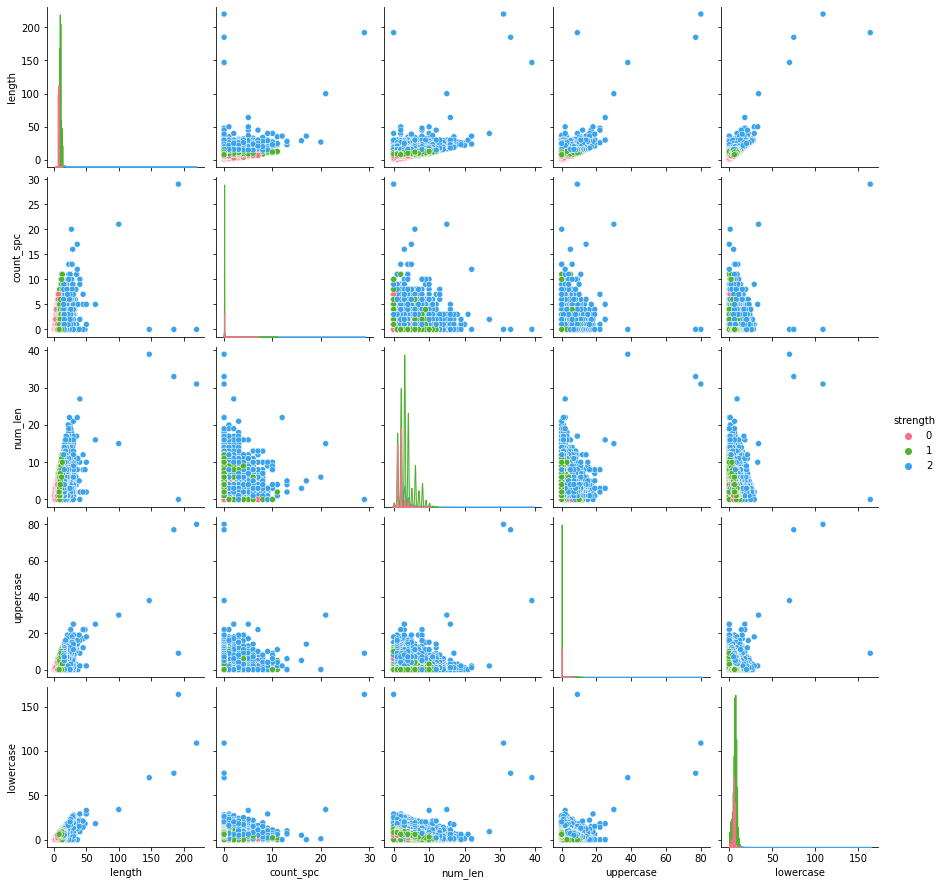

Total time(sec) =  1590.3053374290466


In [59]:
import time
data=df.drop(columns=['password'])
start_time = time.time()
sns.pairplot(data=data,hue='strength',palette=sns.color_palette("husl", 3))
plt.show()
print('Total time(sec) = ',(time.time() - start_time))

In [60]:
data = df[['length', 'count_spc', 'num_len', 'uppercase','lowercase','strength']]
data.head()

,length,count_spc,num_len,uppercase,lowercase,strength
0,8,0,4,0,4,1
1,8,0,4,0,4,1
2,9,0,2,0,7,1
3,8,0,3,0,5,1
4,11,0,1,0,10,1


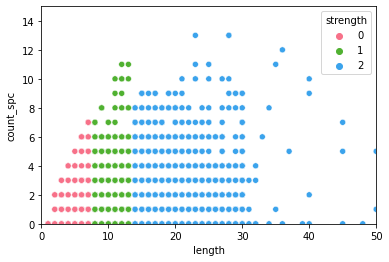

Total time(sec) =  34.753782510757446


In [61]:
start_time = time.time()
sns.scatterplot(x='length',y='count_spc',hue='strength',data=data,palette=sns.color_palette("husl", 3))
plt.xlim([0,50])
plt.ylim([0,15])
plt.show()
print('Total time(sec) = ',(time.time() - start_time))

<AxesSubplot:>

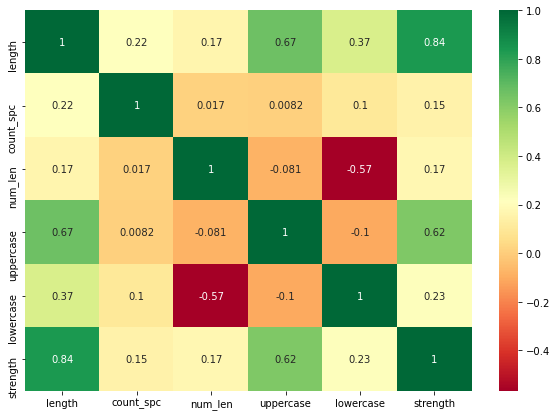

In [62]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),annot=True,cmap="RdYlGn")

In [63]:
data.to_csv('password_data2.csv',index=False)